<a href="https://colab.research.google.com/github/ApoorvaNagarajan/Image-Filter-Kernels/blob/master/assignment/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
# import keras which is a deep learning python library. Keras is capable of
# running on top of most of the opensource deep learning frameworks and makes 
# our life very easy
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#importing all the required utilities
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# load_data function downloads the MNIST dataset and splits it into test and train.
# It returns 2 tuples containing test and train data
# X_train is an array of images used for training
# Y_train is an array of digit labels indicating the digits from 0 to 9 for the images in X_train
# X_test is an array of images used for testing
# Y_test is an array of digit labels indicating the digits from 0 to 9 for the images in X_test. This is used to validate our network output
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


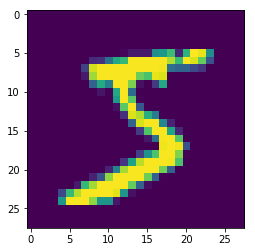

In [4]:
# print the dimensions of the X_train array. From the output looks like there
# are 60000 images of size 28x28
print (X_train.shape)

# import pyton plot libraries which help us visualize data
from matplotlib import pyplot as plt
%matplotlib inline

# Visualize 1st image of the training set
plt.imshow(X_train[0])

In [0]:
# X_train and X_test are reshaped from 3 dimensions to 4 dimensions
# 1st dim : num images
# 2nd and 3rd dim : Width and height of eaach of the images
# 4th dim : number of channels in each of the image. We set this to 1 as the
#           our dataset has only gray images
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# We are normalizing our test and train images. This will make values of all
# the pixels lie between 0 to 1. Normalization helps to maintain accuracy 
# even after a huge number of multiplications involved in multiple convolutions
# First converting the datatype to float to support storing fractional values
# resulting from normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# print the first 10 traing image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# print the class matrix for easy understanding of the class matrix
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
# This code defines our network

# import libraries for Activation and MaxPooling2D layers from keras
from keras.layers import Activation, BatchNormalization

# Our model is a sequential model. We are going to stack layers one after the other
model = Sequential()

##########################################################

# Original : params 68k , accuracy 0.9829, epochs 10

#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))

##########################################################

# Try 1 : params 2lakh , accuracy 0.9933 , epochs 8

#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(128, 3, 3, activation='relu'))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(32, 1, 1, activation='relu'))

#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(128, 3, 3, activation='relu'))
#model.add(Convolution2D(256, 3, 3, activation='relu'))
#model.add(Convolution2D(1024, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3, 3))

#model.add(Flatten())
#model.add(Activation('softmax'))


##########################################################

# Try 2 : params --- , accuracy 0.99 , epochs 10 
# Tried to reduce parameters


#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(64, 3, 3, activation='relu'))
#model.add(Convolution2D(10, 3))
#model.add(Flatten())
#model.add(Activation('softmax'))

##########################################################

# Try 3 : params 15.5k , accuracy 0.9923 , epochs 10 
# Tried to reduce parameters further

#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(BatchNormalization())
#model.add(Convolution2D(32, kernel_size=(3, 3), strides=(2,2), activation='relu'))
#model.add(BatchNormalization())
#model.add(Convolution2D(10, 1, 1, activation='relu'))
#model.add(Convolution2D(10, 3, 3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.05))
#model.add(Convolution2D(10, 3, 3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.05))
#model.add(Convolution2D(10, 3, 3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.05))
#model.add(Convolution2D(10, 3, 3, activation='relu'))
#model.add(BatchNormalization())
#model.add(Convolution2D(10, 4, 4))
#model.add(Flatten())
#model.add(Activation('softmax'))

##########################################################

# Tried various other tweaks

##########################################################

# Try N : params 15.5k , accuracy 0.9923 , epochs 10 
# Tried to improve accuracy

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 5, 5))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:95: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activati

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 22, 22, 16)        4624      
_________________________________________________________________
batch_normalization_45 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 16)        0         
__________

In [0]:
optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,
             validation_data=(X_test, Y_test), verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0243 - val_acc: 0.9917
Epoch 2/10
60000/60000 [==============================] - 42s 704us/step - loss: 0.0378 - acc: 0.9879 - val_loss: 0.0261 - val_acc: 0.9920
Epoch 3/10
60000/60000 [==============================] - 42s 704us/step - loss: 0.0388 - acc: 0.9878 - val_loss: 0.0226 - val_acc: 0.9926
Epoch 4/10
60000/60000 [==============================] - 42s 703us/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.0238 - val_acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 42s 703us/step - loss: 0.0358 - acc: 0.9883 - val_loss: 0.0244 - val_acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0345 - acc: 0.9894 - val_loss: 0.0294 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.0337 - acc: 0.9891 - val_loss: 0.

In [49]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10,
            validation_data=(X_test, Y_test), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1024/60000 [..............................] - ETA: 9s - loss: 0.0310 - acc: 0.9873

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 8s 136us/step - loss: 0.0258 - acc: 0.9915 - val_loss: 0.0208 - val_acc: 0.9940
Epoch 2/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0217 - acc: 0.9932 - val_loss: 0.0199 - val_acc: 0.9943
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0220 - acc: 0.9926 - val_loss: 0.0195 - val_acc: 0.9943
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0211 - acc: 0.9934 - val_loss: 0.0195 - val_acc: 0.9945
Epoch 5/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0192 - val_acc: 0.9943
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0212 - acc: 0.9928 - val_loss: 0.0195 - val_acc: 0.9947
Epoch 7/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0187 - acc: 0.9942 - val_loss: 0.0198 - val_acc: 0.9943
Epoch 8/10
60000/60000 [=====================

In [0]:
# Evaluate the fitted predictor and compare with the ground truth to give us a metric score
# Returns 2 values
# 1st loss values
# 2nd metric value. we have configured metric to accuracy. So we will get back accuracy
score = model.evaluate(X_test, Y_test, verbose=0)

In [51]:
# print the returned score. Outut indicates that the network is very bad and inaccurate
print(score)

[0.01959680400301295, 0.9946]


In [0]:
# Generate the predicted output for the test images
y_pred = model.predict(X_test)

In [53]:
# Just print first 9 predicted values and ground truth values to visualize how
# inaccurate the network is
print(y_pred[:9])
print(y_test[:9])

[[5.91087509e-12 3.57370378e-09 1.17382427e-07 5.69399061e-09
  1.30349602e-13 9.72308779e-12 2.71628093e-15 9.99999881e-01
  2.90170210e-12 1.87524529e-09]
 [7.06727496e-06 5.80247615e-06 9.99983191e-01 1.01019648e-09
  1.05639245e-07 6.58342955e-12 3.79454264e-06 2.53814525e-10
  1.22204857e-09 2.73653850e-10]
 [2.42418565e-08 9.99997854e-01 1.08445711e-07 1.40800802e-08
  3.77429188e-07 1.79865189e-08 7.42631471e-07 7.59882141e-07
  2.39136373e-08 4.42620482e-08]
 [9.99909997e-01 1.46767945e-10 4.44444339e-08 7.46399476e-09
  1.19067833e-09 2.36291289e-08 8.96660567e-05 7.34226502e-09
  1.21500676e-07 1.24636827e-07]
 [1.39792877e-09 3.27467475e-09 3.03037204e-08 9.15251416e-11
  9.99997258e-01 4.52747340e-10 6.07195858e-08 3.02587253e-08
  6.71099931e-09 2.56066392e-06]
 [3.92717183e-08 9.99967456e-01 3.52110533e-07 4.90158536e-09
  6.15885438e-06 9.90901139e-09 4.50727015e-07 2.50539106e-05
  6.98770677e-08 4.42297164e-07]
 [8.10240000e-11 7.01831937e-07 2.96630560e-08 5.43291856e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

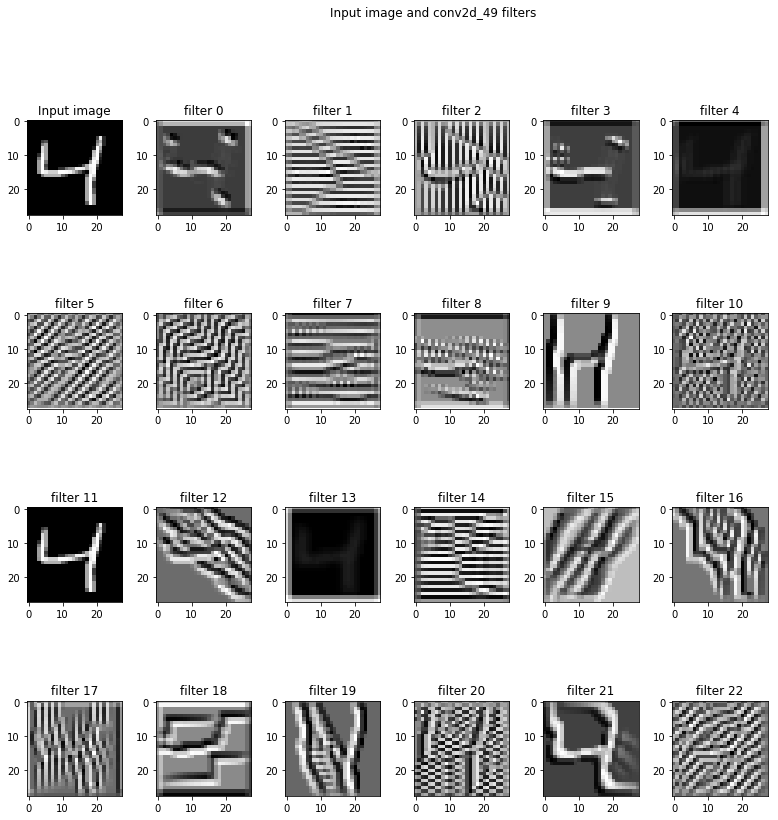

In [56]:
#Visualization of kernel activation

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_49'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2, 5
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()